<a href="https://colab.research.google.com/github/PunitRaveendran/ACM/blob/main/ACM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/mental_health_workplace_survey.csv")
df

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,28,Female,Brazil,Marketing Manager,Sales,18,46,No,2.86,...,4,Yes,6.97,No,1,80K-100K,7.71,21,7.70,0
2996,3997,24,Male,Brazil,Customer Support,Marketing,14,31,No,2.43,...,1,Yes,5.58,Yes,0,60K-80K,3.76,2,2.59,0
2997,3998,22,Female,Canada,Marketing Manager,Marketing,0,38,No,6.87,...,25,No,3.81,No,0,40K-60K,3.03,2,6.95,0
2998,3999,57,Non-binary,Australia,Data Scientist,HR,2,41,No,3.62,...,24,No,9.72,No,3,100K+,6.02,37,9.06,0


In [ ]:
df.isnull()
df.isnull().sum()
#isnull will show true for the blocks that are missing values and isnull().sum() will will show how many are missing

,0
EmployeeID,0
Age,0
Gender,0
Country,0
JobRole,0
Department,0
YearsAtCompany,0
WorkHoursPerWeek,0
RemoteWork,0
BurnoutLevel,0


Enter the column name: WorkHoursPerWeek


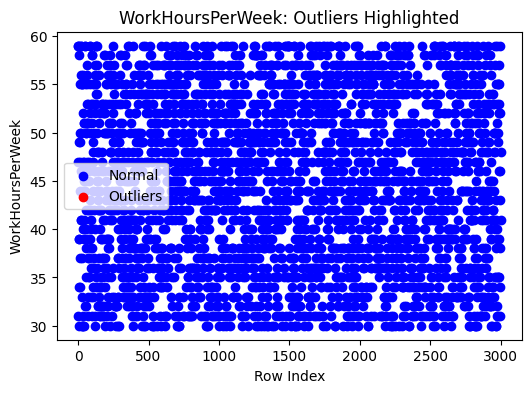

In [ ]:
#user defined function to find the outliers in that particular column entered with refernce to index
def OutlierVal():
    col = input("Enter the column name: ")
    if col not in df.columns:
        print(" Column not found in dataset.")
        return
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #to find the outliers by inter quartile range

    # Boolean mask for outliers
    mask_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    # Plot
    plt.figure(figsize=(6,4))
    plt.scatter(df.index, df[col], color='blue',label='Normal')
    plt.scatter(df.index[mask_outliers], df[col][mask_outliers],color='red', label='Outliers')
    plt.title(f"{col}: Outliers Highlighted")
    plt.xlabel("Row Index")
    plt.ylabel(col)
    plt.legend()
    plt.show()
OutlierVal()

/tmp/ipython-input-45-4289280209.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stress = df.groupby('SleepGroup')['StressLevel'].mean().reset_index()
/tmp/ipython-input-45-4289280209.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_stress, x='SleepGroup', y='StressLevel', palette='viridis')


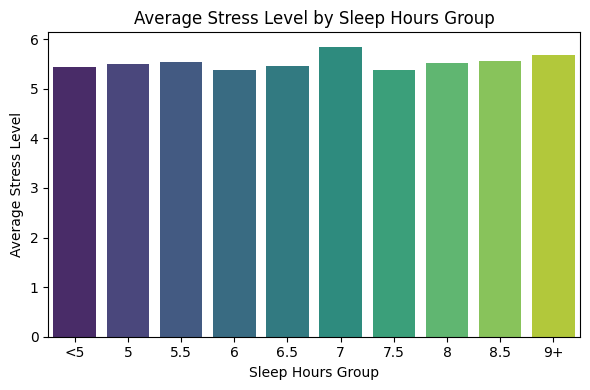

In [ ]:
bins = [0,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5]
labels = ['<5','5','5.5','6','6.5','7','7.5','8','8.5','9+']
df['SleepGroup'] = pd.cut(df['SleepHours'], bins=bins, labels=labels, right=False)
avg_stress = df.groupby('SleepGroup')['StressLevel'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(data=avg_stress, x='SleepGroup', y='StressLevel', palette='viridis')
plt.title('Average Stress Level by Sleep Hours Group')
plt.xlabel('Sleep Hours Group')
plt.ylabel('Average Stress Level')
plt.tight_layout()
plt.show()

/tmp/ipython-input-49-777693367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='HasMentalHealthSupport', y='BurnoutLevel', jitter=True, palette='Set2', alpha=0.6)


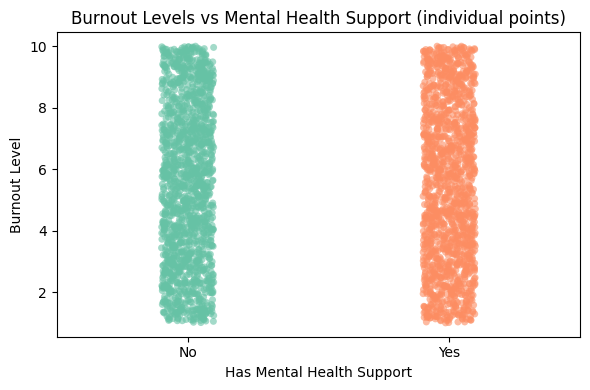

In [ ]:
plt.figure(figsize=(6,4))
sns.stripplot(data=df, x='HasMentalHealthSupport', y='BurnoutLevel', jitter=True, palette='Set2', alpha=0.6)
plt.title('Burnout Levels vs Mental Health Support (individual points)')
plt.xlabel('Has Mental Health Support')
plt.ylabel('Burnout Level')
plt.tight_layout()
plt.show()